### 对移动推荐系统进行可视化数据探索
#### 思路
1. 数据加载及探索
- behavior_type: 浏览、收藏、加购物车、购买，对应取值分别是1、2、3、4
2. 取小样本进行探索,进行特征工程,写成函数
- 行为行为的关系:用户转化率
- 行为与时间关系: 按天\小时统计,分布如何
3. 跑全量数据




In [31]:
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
#数据加载
user_all = pd.read_csv(r'E:\bi_course\L7\tue_course\课堂作业\fresh_comp_offline\tianchi_fresh_comp_train_user.csv')
print('用户数据:', user_all.shape[0], '用户维度:',user_all.shape[1])
item_all = pd.read_csv(r'E:\bi_course\L7\tue_course\课堂作业\fresh_comp_offline\tianchi_fresh_comp_train_item.csv')
print('商品数据:', item_all.shape[0], '商品维度:',item_all.shape[1])

user_all.info() #没有缺失值

用户数据: 23291027 用户维度: 6
商品数据: 620918 商品维度: 3
&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 23291027 entries, 0 to 23291026
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   user_geohash   object
 4   item_category  int64 
 5   time           object
dtypes: int64(4), object(2)
memory usage: 1.0+ GB


In [33]:
#计算转化率

def calc_cvr(df, col_name):
    count_user = df.groupby(col_name, as_index = False).agg({'user_id':'count'})
    cvr = count_user[count_user[col_name] == 4 ]['user_id'] / count_user['user_id'].sum()

    return cvr

In [34]:
def time_transform(df):

    df['time'] = pd.to_datetime(df['time'])
    df['date'] = df['time'].apply(lambda x: x.date() ) #生成date字段
    df['hour'] = df['time'].apply(lambda x: x.hour ) #生成hour字段
    df['weekday'] = df['time'].apply(lambda x: x.isoweekday() ) #生成星期N字段, 星期一是1

    return df

In [35]:
#按日期统计(天,小时)

def stats_count(df, freq, count_col, group_method, groupby_col = None, select_date = None):

    plt.rcParams['figure.figsize'] = (12,8)

    if select_date == None:
        count = df.groupby(freq).agg({count_col:group_method})
        count[count_col].plot(kind = 'bar')
        plt.legend(loc = 'best')
        plt.grid(True)

    else:
        select_df = df[df['date'] == pd.to_datetime(select_date).date()]
        count = select_df.groupby([freq,groupby_col]).agg({count_col:group_method}).unstack().fillna(0)
        count.columns = list(select_df[groupby_col].value_counts().sort_index().index)
        count.plot(kind = 'bar')
        plt.legend(loc = 'best')
        plt.grid(True)
    

    return count

In [36]:
#数据选择
user = user_all.sample( n = 100000, random_state = 1) #取10w随机数据, 跑通流程


In [37]:
%%time
user = time_transform(user)
user


Wall time: 2.07 s


,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour,weekday
6366495,46668974,193858601,1,NaN,5894,2014-11-28 22:00:00,2014-11-28,22,5
4168360,21079914,399373821,1,NaN,2825,2014-11-26 22:00:00,2014-11-26,22,3
17897223,130053173,19900221,1,NaN,7957,2014-12-06 13:00:00,2014-12-06,13,6
22448129,55643672,186143294,1,NaN,5894,2014-11-30 20:00:00,2014-11-30,20,7
18673212,138625405,12732043,1,NaN,5503,2014-12-06 11:00:00,2014-12-06,11,6
...,...,...,...,...,...,...,...,...,...
13991384,46229447,93750178,1,946vsri,3898,2014-11-28 11:00:00,2014-11-28,11,5
13109057,34994749,244200306,1,NaN,5232,2014-11-26 07:00:00,2014-11-26,7,3
16134857,109326356,387781642,4,NaN,5646,2014-12-03 01:00:00,2014-12-03,1,3
7644594,60642416,170169458,1,NaN,4269,2014-12-04 16:00:00,2014-12-04,16,4


In [38]:
cvr = calc_cvr(user,'behavior_type')
print('CVR= %0.2f%%' % (cvr*100))


CVR= 1.04%


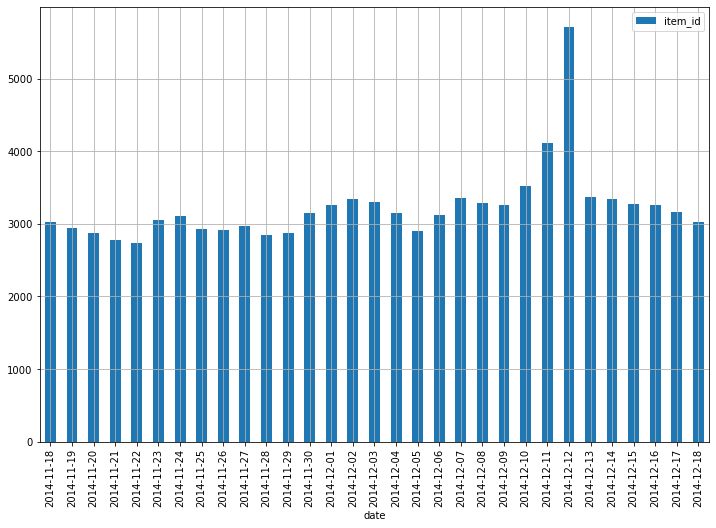

In [39]:
count_day = stats_count(user, freq ='date', group_method = 'count', count_col = 'item_id') #按天统计

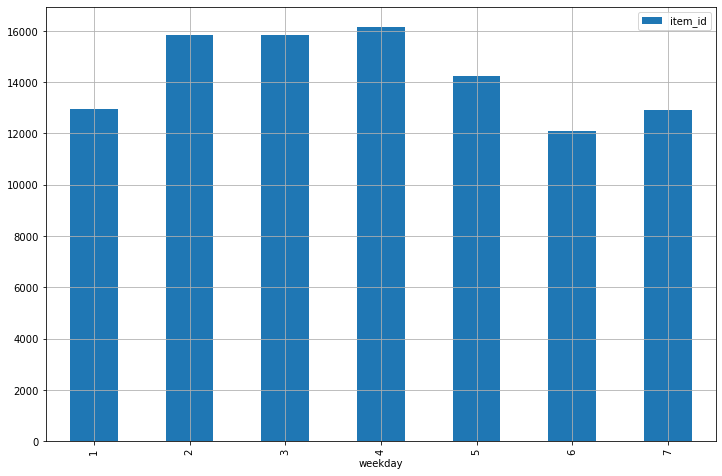

In [40]:
count_day = stats_count(user, freq ='weekday', group_method = 'count', count_col = 'item_id') #按星期统计

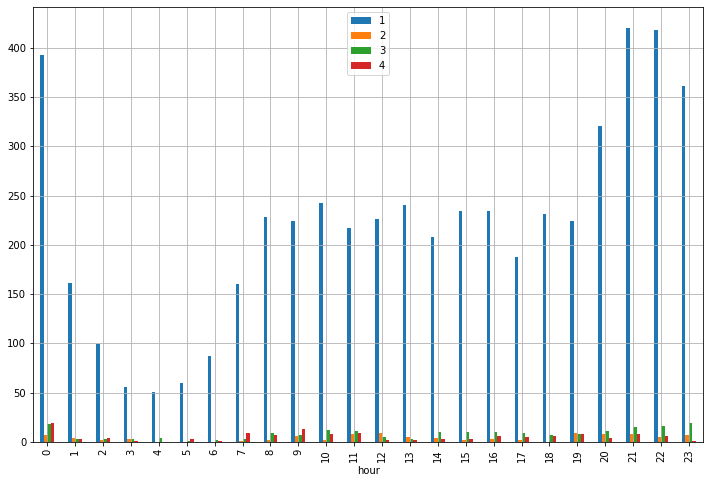

In [41]:
count_hour = stats_count(user, freq ='hour', group_method = 'count', count_col = 'item_id', groupby_col='behavior_type' ,select_date ='2014-12-12') #按小时统计某一天的用户行为

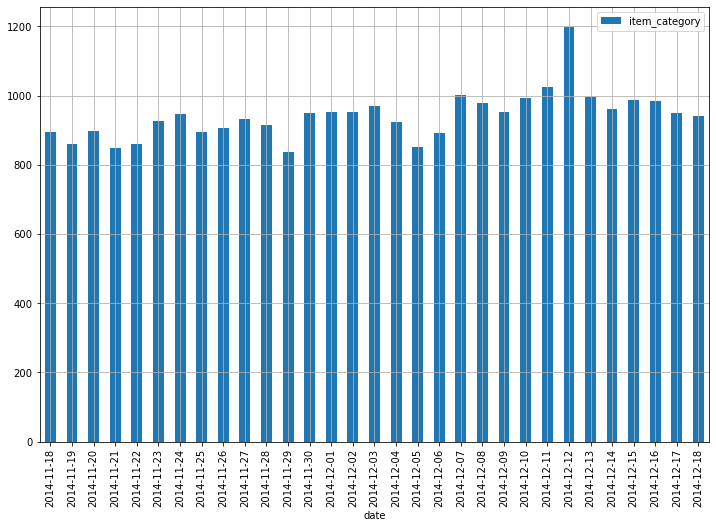

In [42]:
count_day_itemCat = stats_count(user, freq ='date',  group_method = 'nunique', count_col = 'item_category') #按天统计商品种类计算()

In [43]:
user = user_all.copy() #跑全量数据

In [44]:
%%time
user = time_transform(user)
user

Wall time: 6min 29s


,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour,weekday
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18:00:00,2014-12-08,18,1
1,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00,2014-12-12,12,5
2,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00,2014-12-12,12,5
3,10001082,53616768,1,NaN,9762,2014-12-02 15:00:00,2014-12-02,15,2
4,10001082,151466952,1,NaN,5232,2014-12-12 11:00:00,2014-12-12,11,5
...,...,...,...,...,...,...,...,...,...
23291022,65341491,259008790,1,NaN,13164,2014-12-03 12:00:00,2014-12-03,12,3
23291023,65341491,336404938,1,NaN,13164,2014-12-03 12:00:00,2014-12-03,12,3
23291024,65341491,52142024,1,95qhbsu,5201,2014-12-10 22:00:00,2014-12-10,22,3
23291025,65341491,250557965,1,NaN,13164,2014-12-03 12:00:00,2014-12-03,12,3


In [45]:
cvr = calc_cvr(user,'behavior_type')
print('CVR= %0.2f%%' % (cvr*100))


CVR= 1.00%


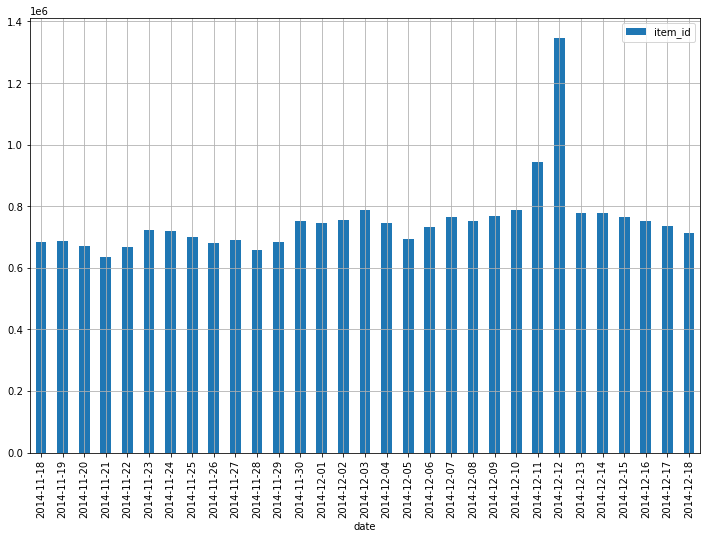

In [46]:
count_day = stats_count(user, freq ='date', group_method = 'count', count_col = 'item_id') #按天统计

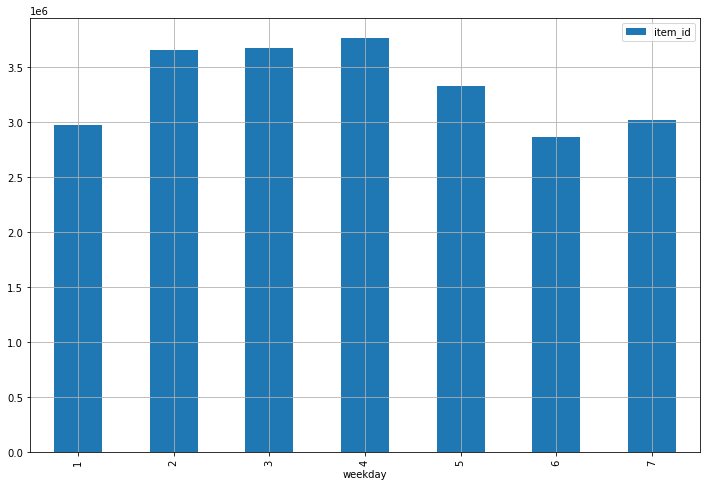

In [47]:
count_day = stats_count(user, freq ='weekday', group_method = 'count', count_col = 'item_id') #按星期统计

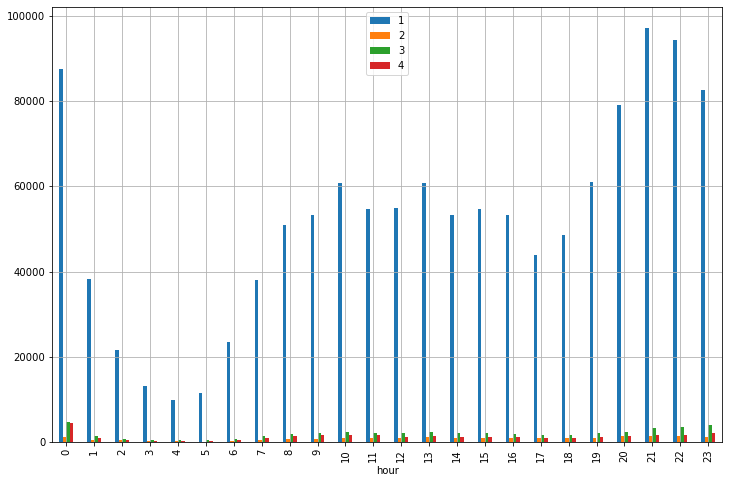

In [48]:
count_hour = stats_count(user, freq ='hour', group_method = 'count', count_col = 'item_id', groupby_col='behavior_type' ,select_date ='2014-12-12') #按小时统计某一天的用户行为

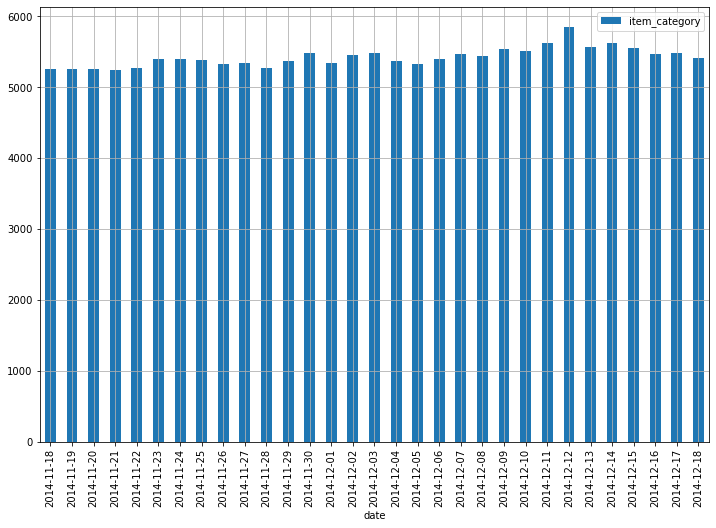

In [49]:
count_day_itemCat = stats_count(user, freq ='date',  group_method = 'nunique', count_col = 'item_category') #按天统计商品种类计算()

### thinking conclusion

- 计数的方式采用了grouby, 便于后面用不同的时间频率对数据进行统计
    - 优势: 比较灵活, 传参即可  
    - 弊端: 效率没有老师的方法高
- 取样用了sample的方式, 对比转化率和分布, 样本和全量相差不大, 样本有一定的代表性
